## **Sentiment and Network Analysis using Reddit Posts**

**Submitted by:** Euclides Rodriguez 

**Course:** DATA 620

**Data Source: Link:** https://github.com/linanqiu/reddit-dataset

### **Introduction**

Reddit is a social network platform that allows user to create posts within a specific group called subreddits.  The subreddit groups are formed under a vast number of topics.  Anything from news, entertainment to physics are topics that are clustered.  There are multiple sub-reddits that have similar topics that are considered under one umberella meta-reddit.  The goal of this project is to sentiment analysis within sub-reddit groups under the meta-reddit group of news.  Reddit serves as a rich platform for gauging public opinion and emotional response, offering valuable insights for political organizations and other stakeholders interested in understanding which issues resonate with different communities. 

Key questions guiding this analysis include: 

Are there specific subreddit groups that display positive or negative sentiment?

What are the key words used in each subreddit?

Are there users that participate in multiple subreddits within the new meta-reddit groups?



### **Dataset Headers**  
0 = text: Text of the comment / thread  
1 = id: Unique reddit id for the comment / thread  
2 = subreddit: Subreddit that the comment / thread belongs to  
3 = meta: Metareddit that the comment / thread belongs to. Subreddits belong to metareddits. A subreddit can be leagueoflegends. The metareddit for that subreddit would be gaming.  
4 = time: UNIX timestamp of the comment / thread  
5 = author: Username of the author of the comment / thread  
6 = ups: Number of upvotes the comment / thread received  
7 = downs: Number of downvotes the comment / thread received  
8 = authorlinkkarma: The author's link karma. What is Link Karma?  
9 = authorkarma: The author's karma. Reddit FAQ explaining karma.  
10 = authorisgold: Boolean indicator for the gold status of the user. 1 for gold users, 0 for non-gold (normal) users. Reddit FAQ explaining gold status.  


In [338]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import opinion_lexicon
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import networkx as nx
nltk.download('opinion_lexicon')

[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     C:\Users\erodr\AppData\Roaming\nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


True

In [339]:
df_conservative = pd.read_csv('news_conservative.csv')
df_conspiracy = pd.read_csv('news_conspiracy.csv')
df_libertarian = pd.read_csv('news_libertarian.csv')
df_news = pd.read_csv('news_news.csv')
df_offbeat = pd.read_csv('news_offbeat.csv')
df_politics = pd.read_csv('news_politics.csv')
df_truereddit = pd.read_csv('news_truereddit.csv')
df_worldnews = pd.read_csv('news_worldnews.csv')

In [340]:
df_conservative.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10
0,0,to be honest i do nt completely understand th...,d02n8mf,conservative,news,1455671951,promethean7,1,0,21,5178,0.0
1,1,ugh i clicked out after reading this libertard...,d02giht,conservative,news,1455661637,wmegenney,1,0,821,7065,1.0
2,2,like or dislike anyone i do nt think i would ...,d02lqvl,conservative,news,1455669637,gizayabasu,1,0,509,3241,1.0
3,3,kasich is already talking about states after s...,d01xuob,conservative,news,1455635818,SonyXperiaZ3c,9,0,21,3428,0.0
4,4,why just one,d01wy1x,conservative,news,1455634221,propshaft,7,0,42134,27119,0.0


In [341]:
# List of DataFrames to process
dataframes = [df_conservative, df_conspiracy, df_libertarian, df_news, df_offbeat, df_politics, df_truereddit, df_worldnews]  

# Column names to assign
col_names = ['text', 'subreddit', 'meta', 'author', 'up_votes']

#Initialize dataframe list 
processed_dfs = []

# Loop through and process each DataFrame
for df in dataframes:
    df = df.iloc[:, [1, 3, 4, 6, 7]]
    df.columns = col_names
    df = df.dropna(subset=["text"]) 
    processed_dfs.append(df)




In [342]:
len(processed_dfs)

8

In [343]:
#unpacking list
df_conservative, df_conspiracy, df_libertarian, df_news, df_offbeat, df_politics, df_truereddit, df_worldnews = processed_dfs

In [344]:
df_conservative.head()

,text,subreddit,meta,author,up_votes
0,to be honest i do nt completely understand th...,conservative,news,promethean7,1
1,ugh i clicked out after reading this libertard...,conservative,news,wmegenney,1
2,like or dislike anyone i do nt think i would ...,conservative,news,gizayabasu,1
3,kasich is already talking about states after s...,conservative,news,SonyXperiaZ3c,9
4,why just one,conservative,news,propshaft,7


In [345]:
#Create dictonary for scoring of text
pos_score = 1
neg_score = -1
word_dict = {}


# Adding the positive words to the dictionary
for word in opinion_lexicon.positive():
    word_dict[word] = pos_score

# Adding the negative words to the dictionary
for word in opinion_lexicon.negative():
        word_dict[word] = neg_score


In [346]:
def bing_liu_score(text):
    sentiment_score = 0
    bag_of_words = word_tokenize(text.lower())
    for word in bag_of_words:
        if word in word_dict:
            sentiment_score += word_dict[word]
    return sentiment_score / len(bag_of_words) if bag_of_words else 0




In [347]:
#Create new dataframes list with updated headers 
dataframes2 = [df_conservative, df_conspiracy, df_libertarian, df_news, df_offbeat, df_politics, df_truereddit, df_worldnews]

In [348]:
#dataframes2[7]
#%reset -f
#df_conservative.head()
#df_offbeat.isnull().sum()

In [349]:

processed_dfs = []

# Loop through and apply Bing Liu Score to each DataFrame
for df in dataframes2:
    df['Bing_Liu_Score'] = df['text'].apply(bing_liu_score)
    processed_dfs.append(df)


In [350]:
df_conservative.head()

,text,subreddit,meta,author,up_votes,Bing_Liu_Score
0,to be honest i do nt completely understand th...,conservative,news,promethean7,1,0.044944
1,ugh i clicked out after reading this libertard...,conservative,news,wmegenney,1,-0.272727
2,like or dislike anyone i do nt think i would ...,conservative,news,gizayabasu,1,-0.018868
3,kasich is already talking about states after s...,conservative,news,SonyXperiaZ3c,9,0.000000
4,why just one,conservative,news,propshaft,7,0.000000


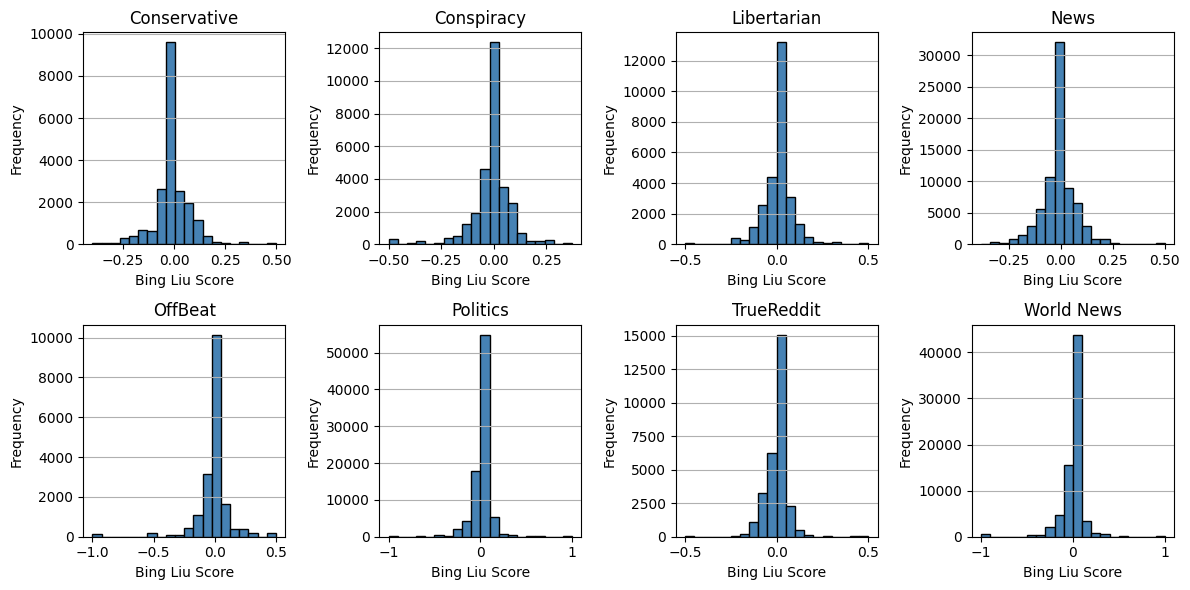

In [351]:


# Create subplots
fig, axes = plt.subplots(2, 4, figsize=(12, 6))  # 2 rows, 4 columns

# Flatten the axes array for easy iteration
axes = axes.flatten()


axes[0].hist(df_conservative['Bing_Liu_Score'], bins=20, color='steelblue', edgecolor='black')
axes[0].set_title('Conservative')
axes[0].set_xlabel('Bing Liu Score')
axes[0].set_ylabel('Frequency')
axes[0].grid(axis="y")

axes[1].hist(df_conspiracy['Bing_Liu_Score'], bins=20, color='steelblue', edgecolor='black')
axes[1].set_title('Conspiracy')
axes[1].set_xlabel('Bing Liu Score')
axes[1].set_ylabel('Frequency')
axes[1].grid(axis="y")


axes[2].hist(df_libertarian['Bing_Liu_Score'], bins=20, color='steelblue', edgecolor='black')
axes[2].set_title('Libertarian')
axes[2].set_xlabel('Bing Liu Score')
axes[2].set_ylabel('Frequency')
axes[2].grid(axis="y")

axes[3].hist(df_news['Bing_Liu_Score'], bins=20, color='steelblue', edgecolor='black')
axes[3].set_title('News')
axes[3].set_xlabel('Bing Liu Score')
axes[3].set_ylabel('Frequency')
axes[3].grid(axis="y")

axes[4].hist(df_offbeat['Bing_Liu_Score'], bins=20, color='steelblue', edgecolor='black')
axes[4].set_title('OffBeat')
axes[4].set_xlabel('Bing Liu Score')
axes[4].set_ylabel('Frequency')
axes[4].grid(axis="y")

axes[5].hist(df_politics['Bing_Liu_Score'], bins=20, color='steelblue', edgecolor='black')
axes[5].set_title('Politics')
axes[5].set_xlabel('Bing Liu Score')
axes[5].set_ylabel('Frequency')
axes[5].grid(axis="y")

axes[6].hist(df_truereddit['Bing_Liu_Score'], bins=20, color='steelblue', edgecolor='black')
axes[6].set_title('TrueReddit')
axes[6].set_xlabel('Bing Liu Score')
axes[6].set_ylabel('Frequency')
axes[6].grid(axis="y")

axes[7].hist(df_worldnews['Bing_Liu_Score'], bins=20, color='steelblue', edgecolor='black')
axes[7].set_title('World News')
axes[7].set_xlabel('Bing Liu Score')
axes[7].set_ylabel('Frequency')
axes[7].grid(axis="y")


plt.tight_layout()
plt.show()

In [352]:
#dataframes2 = [df_conservative, df_conspiracy, df_libertarian, df_news, df_offbeat, df_politics, df_truereddit, df_worldnews]

# Combine all tweet texts into a single string
all_text = ' '.join(df_conservative['text'])
all_text1 = ' '.join(df_conspiracy['text'])
all_text2 = ' '.join(df_libertarian['text'])
all_text3 = ' '.join(df_news['text'])
all_text4 = ' '.join(df_offbeat['text'])
all_text5 = ' '.join(df_politics['text'])
all_text6 = ' '.join(df_truereddit['text'])
all_text7 = ' '.join(df_worldnews['text'])


# Generate a word cloud of the most frequent words
wordcloud = WordCloud(width=800, height=400, colormap = 'RdBu', background_color ='white').generate(all_text)
wordcloud1 = WordCloud(width=800, height=400, colormap = 'RdBu', background_color ='white').generate(all_text1)
wordcloud2 = WordCloud(width=800, height=400, colormap = 'RdBu', background_color ='white').generate(all_text2)
wordcloud3 = WordCloud(width=800, height=400, colormap = 'RdBu', background_color ='white').generate(all_text3)
wordcloud4 = WordCloud(width=800, height=400, colormap = 'RdBu', background_color ='white').generate(all_text4)
wordcloud5 = WordCloud(width=800, height=400, colormap = 'RdBu', background_color ='white').generate(all_text5)
wordcloud6 = WordCloud(width=800, height=400, colormap = 'RdBu', background_color ='white').generate(all_text6)
wordcloud7 = WordCloud(width=800, height=400, colormap = 'RdBu', background_color ='white').generate(all_text7)


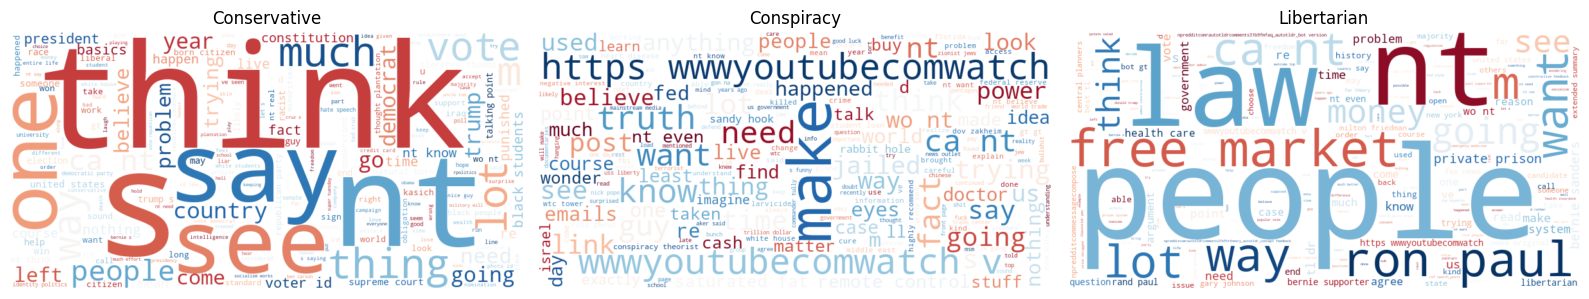

In [353]:

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(16, 24))  # 1 rows, 3 columns

axes[0].imshow(wordcloud, interpolation='bilinear')
axes[0].set_title('Conservative')
axes[0].axis('off')

axes[1].imshow(wordcloud1, interpolation='bilinear')
axes[1].set_title('Conspiracy')
axes[1].axis('off')

axes[2].imshow(wordcloud2, interpolation='bilinear')
axes[2].set_title('Libertarian')
axes[2].axis('off')


plt.tight_layout()
plt.show()

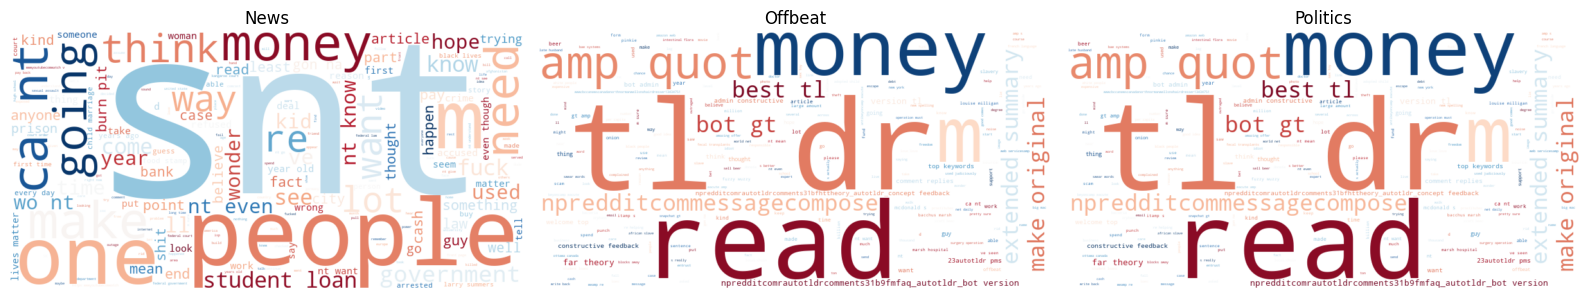

In [354]:
# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(16, 24))  # 4 rows, 2 columns


axes[0].imshow(wordcloud3, interpolation='bilinear')
axes[0].set_title('News')
axes[0].axis('off')

axes[1].imshow(wordcloud4, interpolation='bilinear')
axes[1].set_title('Offbeat')
axes[1].axis('off')

axes[2].imshow(wordcloud4, interpolation='bilinear')
axes[2].set_title('Politics')
axes[2].axis('off')



plt.tight_layout()
plt.show()

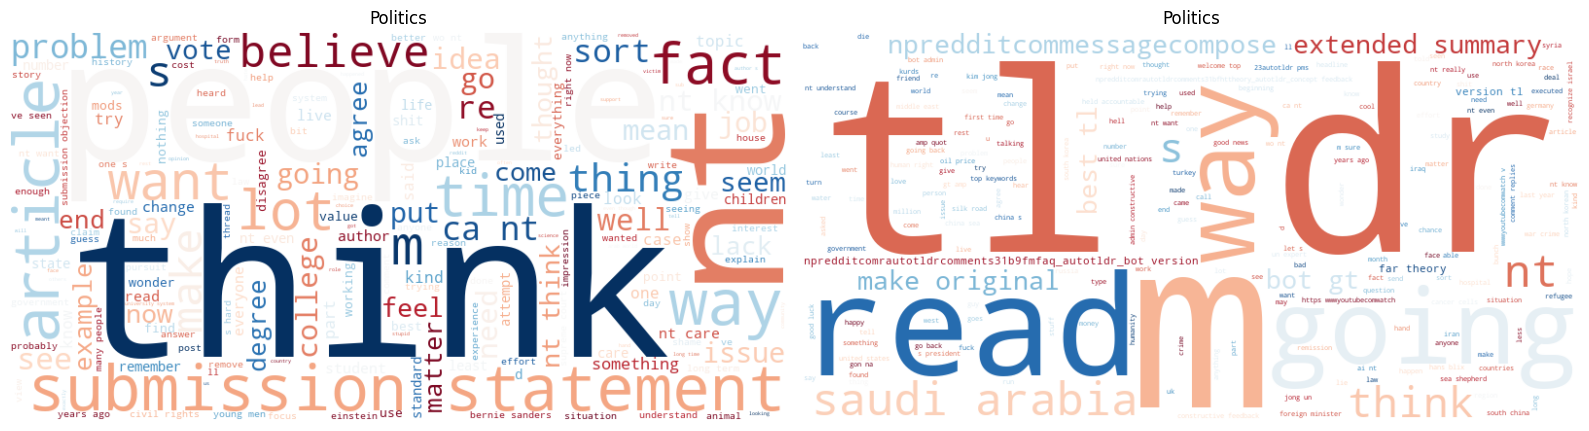

In [355]:
# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 24))  # 4 rows, 2 columns


axes[0].imshow(wordcloud6, interpolation='bilinear')
axes[0].set_title('Politics')
axes[0].axis('off')


axes[1].imshow(wordcloud7, interpolation='bilinear')
axes[1].set_title('Politics')
axes[1].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Prepare meta dataframe with the 'subreddit' and 'author' columns from each DataFrame
dfs = [
    df_conservative[['subreddit', 'author']],
    df_conspiracy[['subreddit', 'author']],
    df_libertarian[['subreddit', 'author']],
    df_news[['subreddit', 'author']],
    df_offbeat[['subreddit', 'author']],
    df_politics[['subreddit', 'author']],
    df_truereddit[['subreddit', 'author']],
    df_worldnews[['subreddit', 'author']],
]

# Concatenate all into a single DataFrame
df_meta = pd.concat(dfs, ignore_index=True)

In [333]:
df_meta.head()

,subreddit,author
0,conservative,promethean7
1,conservative,wmegenney
2,conservative,gizayabasu
3,conservative,SonyXperiaZ3c
4,conservative,propshaft


In [358]:
#Construct Networkx Graph from df_meta dataframe 
edgelist = list(df_meta.itertuples(index=False, name=None))
G=nx.Graph(edgelist)

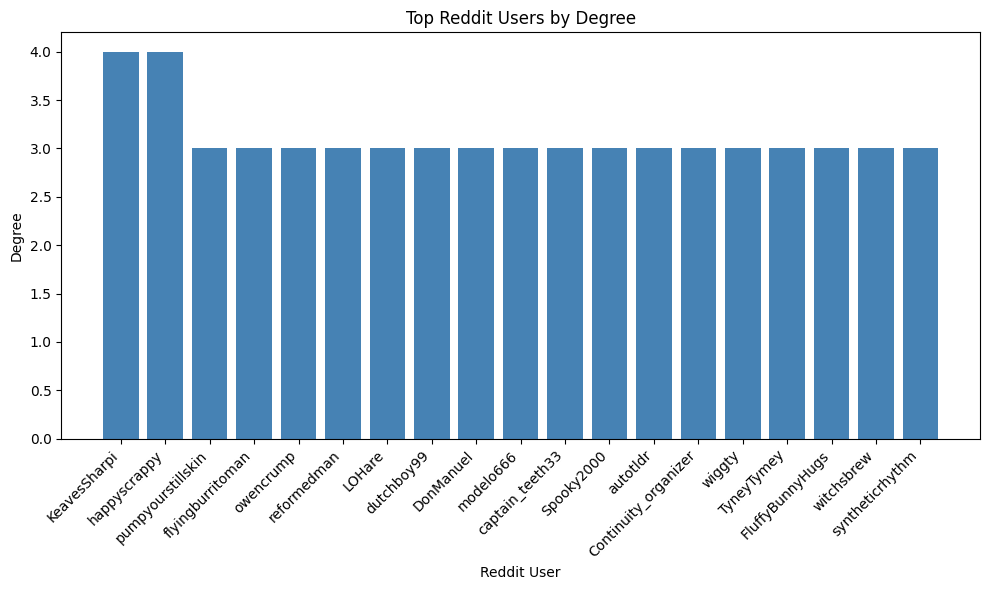

In [365]:
#Create a list with reddit users and number of degrees with the news meta-reddit group.
deg=nx.degree(G)

# Sort the list by the second element of each tuple in descending order
sorted_data = sorted(deg, key=lambda x: x[1], reverse=True)

# Extract the top 20 tuples excluding the subreddit groups and [deleted]
top_20 = sorted_data[9:28]

# Extract labels and values for plotting
labels, values = zip(*top_20)

# Create the bar plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.bar(labels, values, color='steelblue')

# Add labels and title
plt.xlabel("Reddit User")
plt.ylabel("Degree")
plt.title("Top Reddit Users by Degree")

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45, ha="right")

# Show the plot
plt.tight_layout() # To prevent labels from overlapping
plt.show()

In [362]:

# Calculate the degree of each node
node_degree_dict = dict(G.degree())

# Filter nodes with degree >= 10
nodes_with_high_degree = [node for node, degree in node_degree_dict.items() if degree >= 3]

# Create the subgraph with the filtered nodes
H = nx.subgraph(G, nodes_with_high_degree)

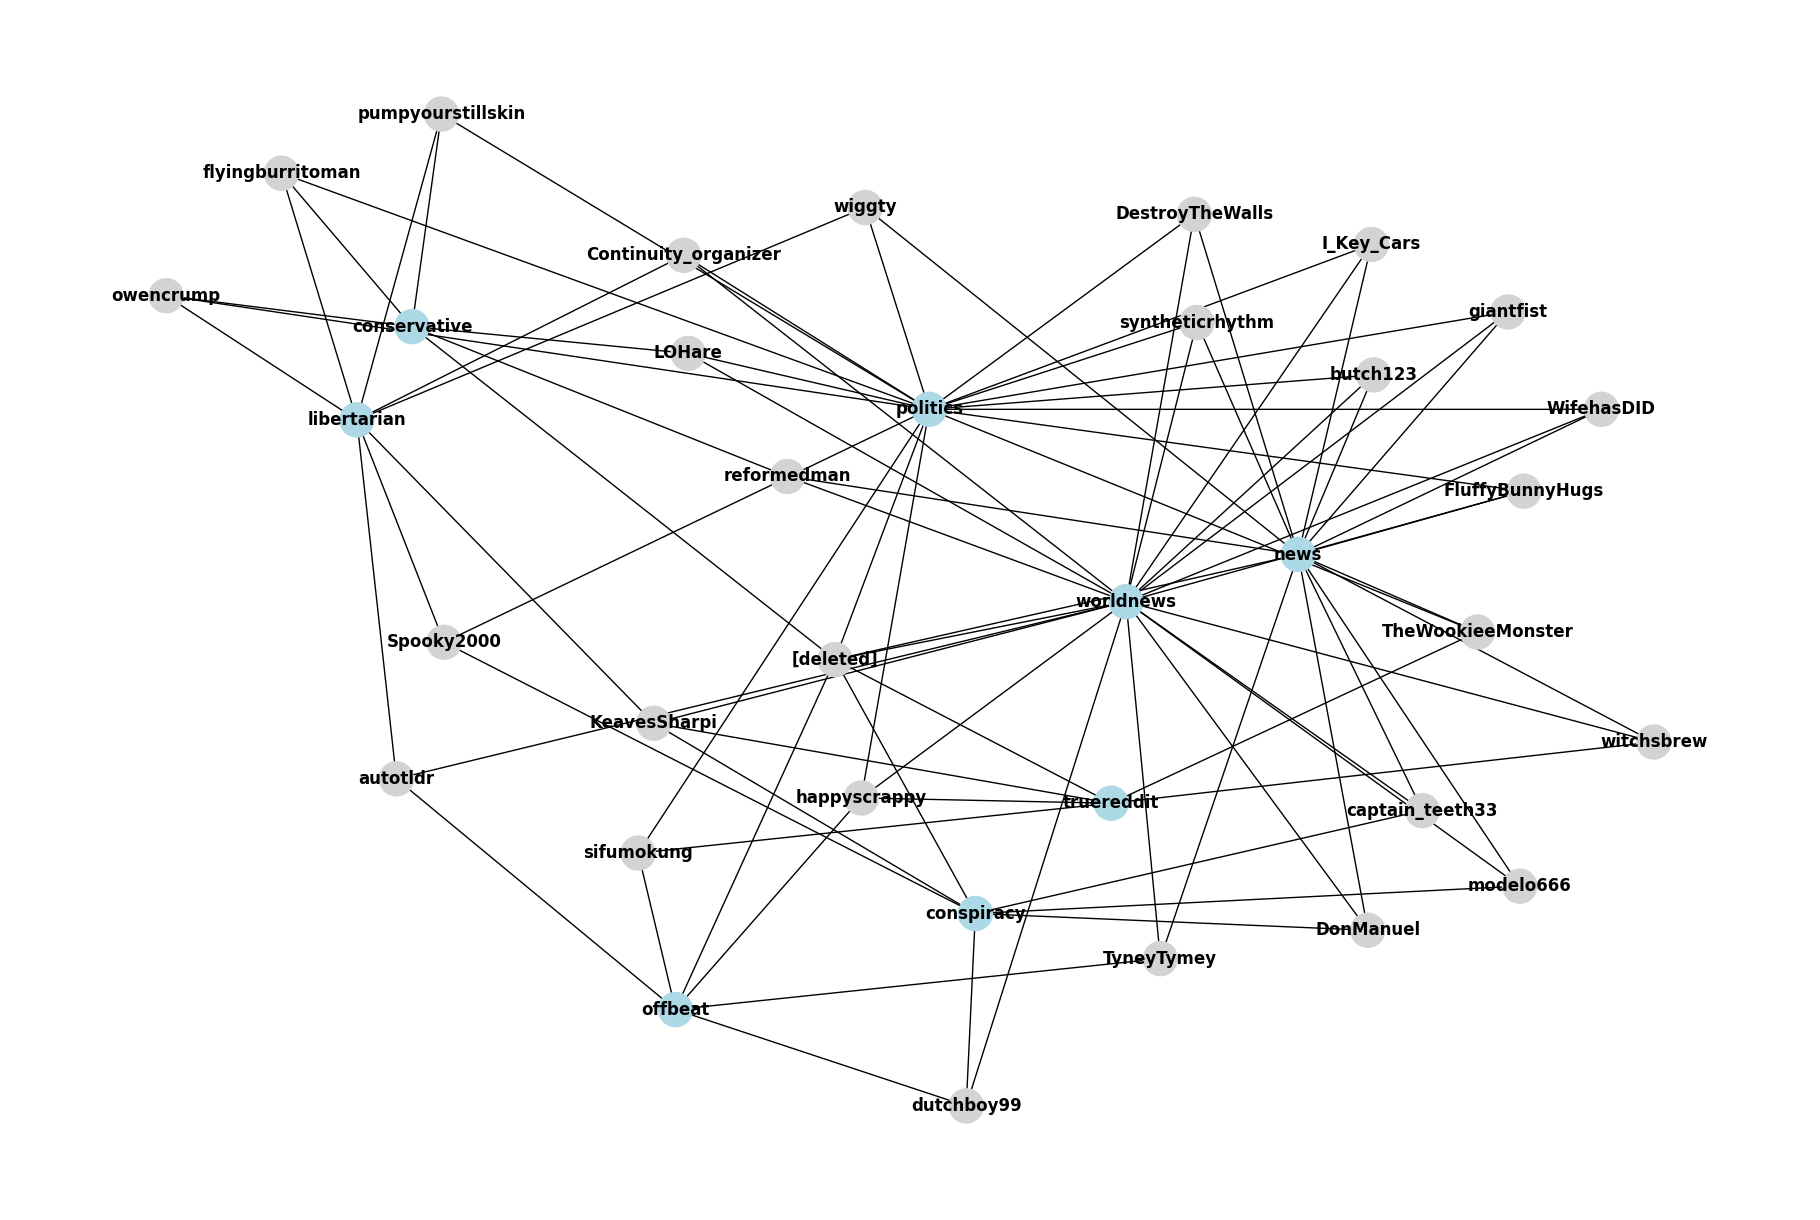

In [370]:
#Plot the graph 
# List of subreddit nodes to color light blue
subreddit_nodes = [
    'politics', 'worldnews', 'news', 'truereddit',
    'conspiracy', 'libertarian', 'conservative', 'offbeat'
]

# Create a color map: light blue for subreddits, default (e.g., gray) for others
node_colors = ['lightblue' if node in subreddit_nodes else 'lightgray' for node in H.nodes()]
plt.figure(figsize=(18, 12))
nx.draw(H, with_labels=True, font_weight='bold', node_color=node_colors, node_size = 600)
plt.show()
